In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/content/housing_prices.csv')
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


**Identifying missing values**

In [3]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

**Identifying duplicated values**

In [4]:
df.duplicated().any()

False

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


**ENCODING CATEGORICAL VALUES**

In [6]:
df['mainroad'] = df['mainroad'].replace({'yes': 1, 'no': 0})
df['guestroom'] = df['guestroom'].replace({'yes': 1, 'no': 0})
df['basement'] = df['basement'].replace({'yes': 1, 'no': 0})
df['hotwaterheating'] = df['hotwaterheating'].replace({'yes': 1, 'no': 0})
df['airconditioning'] = df['airconditioning'].replace({'yes': 1, 'no': 0})
df['prefarea'] = df['prefarea'].replace({'yes': 1, 'no': 0})
df['furnishingstatus'] = df['furnishingstatus'].replace({'furnished': 1, 'semi-furnished': 2, 'unfurnished': 3})

In [7]:
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


---Visualizing Relationships Between Variables by using pairplot

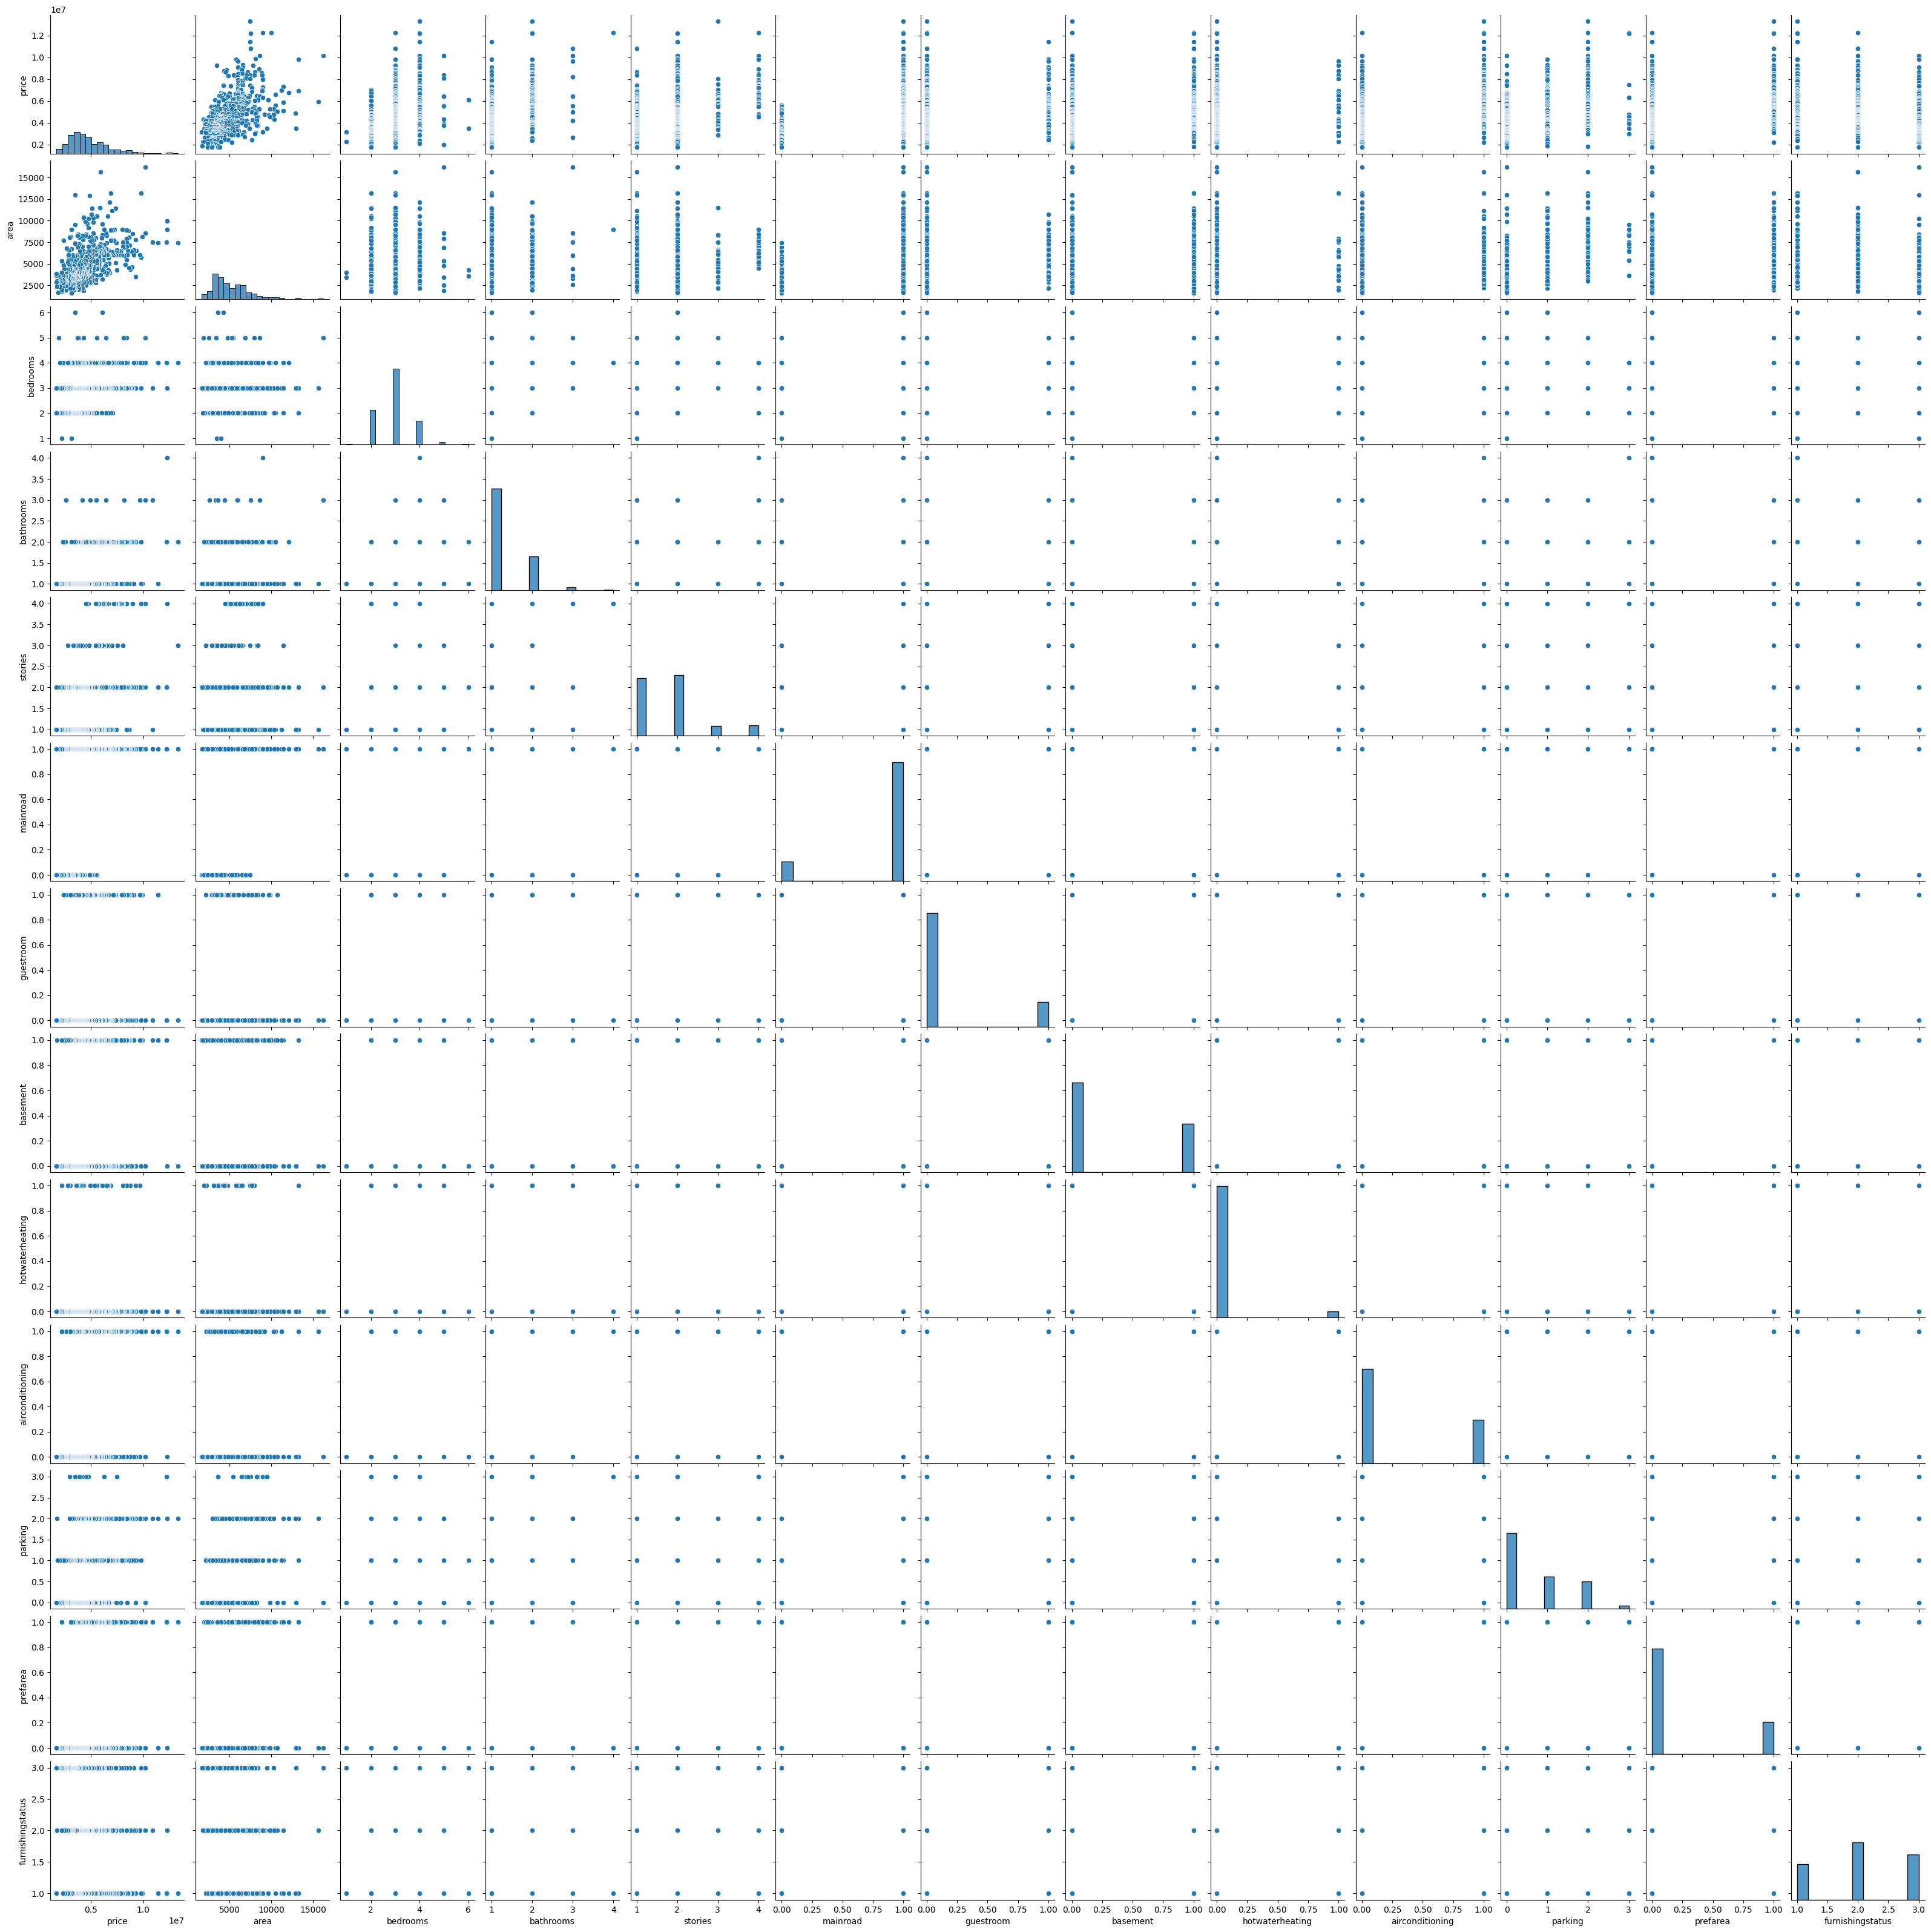

In [8]:
sns.pairplot(df)
plt.show()

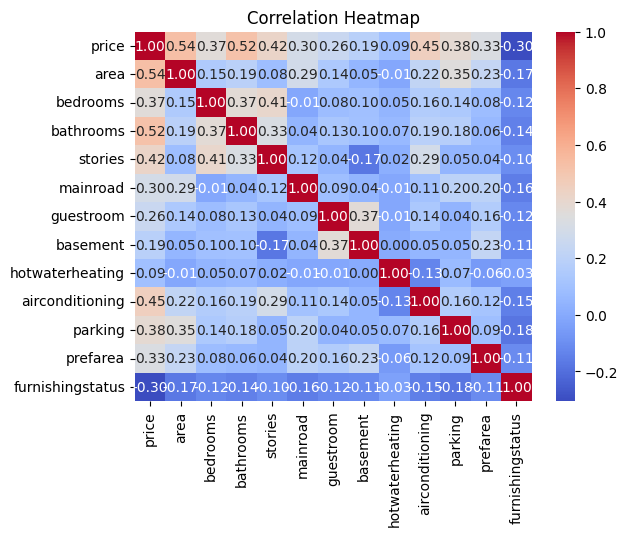

In [9]:
sns.heatmap(df.corr(),annot=True, cmap='coolwarm' ,fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

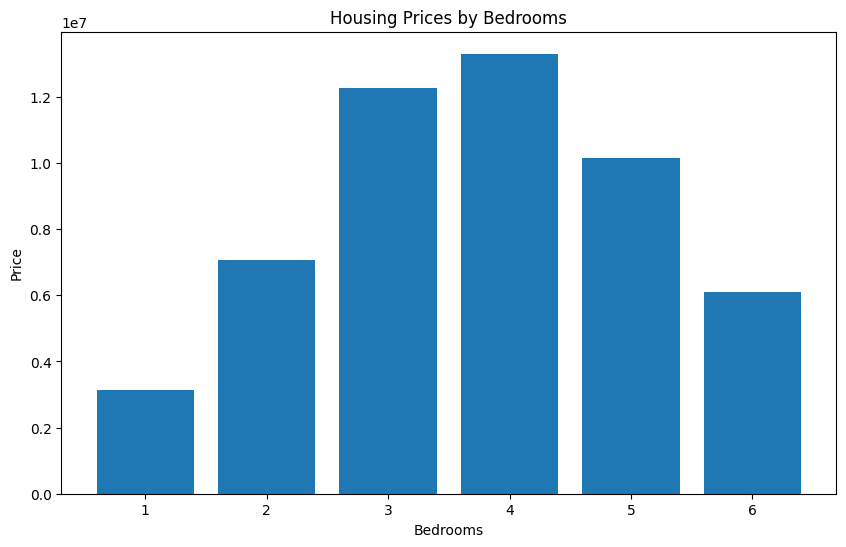

In [19]:
plt.figure(figsize=(10, 6))
plt.bar(x='bedrooms', height='price', data=df)
plt.title('Housing Prices by Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

**LINEAR REGRESSION**

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
col1 = ['area', 'bedrooms', 'bathrooms', 'hotwaterheating', 'parking','guestroom']
x = df[col1]
y = df['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)
model = LinearRegression()
model.fit(x_train, y_train)
print('Accuracy:',model.score(x_train,y_train))
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

Accuracy: 0.5363060384702881
R^2 Score: 0.49322004580007783


**GradientBoostingRegressor**

In [11]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Training the Gradient Boosting Regressor
model2 = GradientBoostingRegressor(random_state=42)
model2.fit(x_train, y_train)

# Make predictions
y_pred_gbr = model2.predict(x_test)

# Calculate evaluation metrics
print('Accuracy:',model2.score(x_train,y_train))
y_pred = model2.predict(x_test)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f'R²: {r2_gbr}')

Accuracy: 0.8202219166190466
R²: 0.47451871688797165
